# Chap 3 傾向スコアを用いた分析

## 3.4 LaLondeデータセットの分析

In [2]:
!wget https://users.nber.org/~rdehejia/data/cps_controls.dta

--2020-04-19 22:02:42--  https://users.nber.org/~rdehejia/data/cps_controls.dta
users.nber.org (users.nber.org) をDNSに問いあわせています... 198.71.6.35
users.nber.org (users.nber.org)|198.71.6.35|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 705546 (689K)
`cps_controls.dta.1' に保存中

cps_controls.dta.1  100%[===================>] 689.01K   282KB/s 時間 2.4s       

2020-04-19 22:02:47 (282 KB/s) - `cps_controls.dta.1' へ保存完了 [705546/705546]



In [3]:
!wget https://users.nber.org/~rdehejia/data/cps_controls3.dta

--2020-04-19 22:02:50--  https://users.nber.org/~rdehejia/data/cps_controls3.dta
users.nber.org (users.nber.org) をDNSに問いあわせています... 198.71.6.35
users.nber.org (users.nber.org)|198.71.6.35|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 20774 (20K)
`cps_controls3.dta.1' に保存中

cps_controls3.dta.1 100%[===================>]  20.29K   113KB/s 時間 0.2s       

2020-04-19 22:02:51 (113 KB/s) - `cps_controls3.dta.1' へ保存完了 [20774/20774]



In [4]:
!wget https://users.nber.org/~rdehejia/data/nsw_dw.dta

--2020-04-19 22:02:51--  https://users.nber.org/~rdehejia/data/nsw_dw.dta
users.nber.org (users.nber.org) をDNSに問いあわせています... 198.71.6.35
users.nber.org (users.nber.org)|198.71.6.35|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 28598 (28K)
`nsw_dw.dta.1' に保存中

nsw_dw.dta.1        100%[===================>]  27.93K   154KB/s 時間 0.2s       

2020-04-19 22:02:52 (154 KB/s) - `nsw_dw.dta.1' へ保存完了 [28598/28598]



In [5]:
# 別のデータ 
cps1_data = pd.read_stata('./cps_controls.dta')
cps3_data = pd.read_stata('./cps_controls3.dta')
# RCTしたデータ (treat + control)
nswdw_data = pd.read_stata('./nsw_dw.dta')

In [6]:
cps1_data.head()

,data_id,treat,age,education,black,hispanic,married,nodegree,re74,re75,re78
0,CPS1,0.0,45.0,11.0,0.0,0.0,1.0,1.0,21516.669922,25243.550781,25564.669922
1,CPS1,0.0,21.0,14.0,0.0,0.0,0.0,0.0,3175.970947,5852.564941,13496.080078
2,CPS1,0.0,38.0,12.0,0.0,0.0,1.0,0.0,23039.019531,25130.759766,25564.669922
3,CPS1,0.0,48.0,6.0,0.0,0.0,1.0,1.0,24994.369141,25243.550781,25564.669922
4,CPS1,0.0,18.0,8.0,0.0,0.0,1.0,1.0,1669.295044,10727.610352,9860.869141


In [7]:
cps1_data.treat.mean()

0.0

In [8]:
nswdw_data.head()

,data_id,treat,age,education,black,hispanic,married,nodegree,re74,re75,re78
0,Dehejia-Wahba Sample,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,9930.045898
1,Dehejia-Wahba Sample,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,3595.894043
2,Dehejia-Wahba Sample,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,24909.449219
3,Dehejia-Wahba Sample,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,7506.145996
4,Dehejia-Wahba Sample,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,289.789886


### (3) データセットの準備

- nsdw_data: 特定の条件を満たす人々からランダムに職業訓練による介入を行なったデータ
- cps1_nsw_data: nswの介入群と他の調査(CPS)におけるデータを混ぜたもの
- cps3_nsw_data: nswの介入群とCPSから条件を満たすものに絞ったデータを混ぜたもの

In [9]:
nswdw_data.treat.mean()

0.4157303273677826

In [10]:
cps1_nsw_data = pd.concat([cps1_data, nswdw_data.query('treat == 1.0')])
cps1_nsw_data.treat.mean()

0.011435989290475845

In [11]:
cps3_nsw_data = pd.concat([cps3_data, nswdw_data.query('treat == 1.0')])
cps3_nsw_data.treat.mean()

0.3013029396533966

### (4) RCTによる結果の確認

In [12]:
import statsmodels.api as sm

result = sm.OLS(
    exog=nswdw_data.drop(columns=['data_id', 're78']).assign(intercept=1),
    endog=nswdw_data['re78']
).fit()

In [13]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   re78   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2.804
Date:                Sun, 19 Apr 2020   Prob (F-statistic):            0.00329
Time:                        22:03:02   Log-Likelihood:                -4534.2
No. Observations:                 445   AIC:                             9088.
Df Residuals:                     435   BIC:                             9129.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
treat       1676.3426    638.682      2.625      0.009     421.056    2931.629
age           55.3167     45.284      1.222      0.223     -33.686     144.319
education    395.7343    227.415      1.740      0.083     -51.234     842.703
black      -2159.5222   1169.036     -1.847      0.065   -4457.183     138.139
hispanic     164.0327   1549.457      0.106      0.916   -2881.320    3209.386
married     -138.7253    879.728     -0.158      0.875   -1867.771    1590.321
nodegree     -70.6806   1004.387     -0.070      0.944   -2044.736    1903.374
re74           0.0821      0.077      1.061      0.289      -0.070       0.234
re75           0.0528      0.135      0.389      0.697      -0.214       0.319
intercept    785.0614   3374.969      0.233      0.816   -5848.211    7418.334
==============================================================================
Omnibus:                      284.809   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3770.859
Skew:                           2.545   Prob(JB):                         0.00
Kurtosis:                      16.321   Cond. No.                     7.19e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.4.3 回帰分析による効果の推定

In [14]:
result = sm.OLS(
    exog=cps1_nsw_data.drop(columns=['data_id', 're78']).assign(intercept=1),
    endog=cps1_nsw_data['re78']
).fit()

result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.476      
Dependent Variable: re78             AIC:                332387.0699
Date:               2020-04-19 22:03 BIC:                332463.9833
No. Observations:   16177            Log-Likelihood:     -1.6618e+05
Df Model:           9                F-statistic:        1631.      
Df Residuals:       16167            Prob (F-statistic): 0.00       
R-squared:          0.476            Scale:              4.9052e+07 
--------------------------------------------------------------------
               Coef.   Std.Err.    t     P>|t|    [0.025     0.975] 
--------------------------------------------------------------------
treat         699.1317 547.6361   1.2766 0.2017  -374.2956 1772.5590
age          -101.8551   5.8808 -17.3200 0.0000  -113.3820  -90.3281
education     160.1864  28.5941   5.6021 0.0000   104.1388  216.2339
black        -836.9473 212.8256  -3.9326 0.0001 -1254.1090 -419.7856
hispanic     -218.3184 218.6635  -0.9984 0.3181  -646.9231  210.2863
married        73.0758 142.4086   0.5131 0.6079  -206.0608  352.2123
nodegree      372.2376 177.5901   2.0960 0.0361    24.1414  720.3338
re74            0.2895   0.0121  23.9533 0.0000     0.2658    0.3132
re75            0.4707   0.0122  38.6968 0.0000     0.4469    0.4946
intercept    5735.7312 445.1756  12.8842 0.0000  4863.1377 6608.3248
--------------------------------------------------------------------
Omnibus:             1536.524       Durbin-Watson:          1.965   
Prob(Omnibus):       0.000          Jarque-Bera (JB):       3028.407
Skew:                -0.632         Prob(JB):               0.000   
Kurtosis:            4.701          Condition No.:          233367  
====================================================================
* The condition number is large (2e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [15]:
from sklearn.linear_model import LinearRegression

def train(df):
    y = df['re78']
    X = df.drop(columns=['data_id', 're78'])
    X['intercept'] = 1
    clf = LinearRegression().fit(X, y)
    return clf, X.columns

In [16]:
cls, columns = train(cps1_nsw_data)
pd.DataFrame([columns, cls.coef_])

,0,1,2,3,4,5,6,7,8,9
0,treat,age,education,black,hispanic,married,nodegree,re74,re75,intercept
1,699.132,-101.855,160.186,-836.947,-218.318,73.0758,372.238,0.289492,0.470729,0


In [17]:
result = sm.OLS(
    exog=cps3_nsw_data.drop(columns=['data_id', 're78']).assign(intercept=1),
    endog=cps3_nsw_data['re78']
).fit()

result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.135     
Dependent Variable: re78             AIC:                12615.5042
Date:               2020-04-19 22:03 BIC:                12659.7042
No. Observations:   614              Log-Likelihood:     -6297.8   
Df Model:           9                F-statistic:        11.64     
Df Residuals:       604              Prob (F-statistic): 5.99e-17  
R-squared:          0.148            Scale:              4.8274e+07
-------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------------------------------------------------
treat       1548.2438  781.2793  1.9817 0.0480    13.8899 3082.5976
age           12.9776   32.4889  0.3994 0.6897   -50.8273   76.7826
education    403.9412  158.9062  2.5420 0.0113    91.8654  716.0171
black      -1240.6441  768.7644 -1.6138 0.1071 -2750.4200  269.1318
hispanic     498.8968  941.9425  0.5296 0.5966 -1350.9835 2348.7772
married      406.6208  695.4723  0.5847 0.5590  -959.2168 1772.4584
nodegree     259.8174  847.4421  0.3066 0.7593 -1404.4735 1924.1082
re74           0.2964    0.0583  5.0860 0.0000     0.1819    0.4108
re75           0.2315    0.1046  2.2130 0.0273     0.0261    0.4370
intercept     66.5145 2436.7458  0.0273 0.9782 -4719.0089 4852.0380
-------------------------------------------------------------------
Omnibus:             216.123       Durbin-Watson:          1.994   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       1182.664
Skew:                1.467         Prob(JB):               0.000   
Kurtosis:            9.134         Condition No.:          76354   
===================================================================
* The condition number is large (8e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

In [18]:
cls, columns = train(cps3_nsw_data)
pd.DataFrame([columns, cls.coef_])

,0,1,2,3,4,5,6,7,8,9
0,treat,age,education,black,hispanic,married,nodegree,re74,re75,intercept
1,1548.24,12.9776,403.941,-1240.64,498.897,406.621,259.817,0.296377,0.231526,0


### 3.4.4 傾向スコアによる効果の推定

In [19]:
from sklearn.linear_model import LogisticRegression

def train_propensity_score(df):
    y = df['treat']
    X = df.drop(columns=['data_id', 're78', 'treat'])
#    X['re74_2'] = X['re74']**2
#    X['re75_2'] = X['re75']**2
    X['intercept'] = 1
    clf = LogisticRegression(fit_intercept=False).fit(X, y)
    return clf, X, y

In [20]:
clf, X, y = train_propensity_score(cps1_nsw_data)

/Users/takashinishibayashi/dev/ipython-notebook-bootstrap/env/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
pd.DataFrame([X.columns, clf.coef_[0]])

,0,1,2,3,4,5,6,7,8
0,age,education,black,hispanic,married,nodegree,re74,re75,intercept
1,-0.0260253,-0.197035,0.200522,-0.0112948,-0.0438883,0.0163002,-4.59409e-05,-0.000241936,-0.0173187


In [22]:
# 傾向スコアの確認
from sklearn.metrics import roc_auc_score

roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.9132573043278396

### 傾向スコアマッチング

In [23]:
cps1_with_ps = cps1_nsw_data.copy()
cps1_with_ps['re74_2'] = cps1_with_ps['re74']**2
cps1_with_ps['re75_2'] = cps1_with_ps['re75']**2
cps1_with_ps['ps'] = clf.predict_proba(X)[:, 1]

In [28]:
y.values.reshape([-1, 1])

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [29]:
from sklearn.neighbors import NearestNeighbors

def matching(X, y, ps_score, random_state=0):
    df_all = pd.DataFrame({'treatment': y, 'ps_score': ps_score})

    group1_df = df_all[df_all.treatment==1].copy()
    group1_indices = group1_df.index
    group1_df = group1_df.reset_index(drop=True)
    group2_df = df_all[df_all.treatment==0].copy()
    group2_indices = group2_df.index
    group2_df = group2_df.reset_index(drop=True)

    # 全体の傾向スコアの標準偏差 * 0.2をしきい値とする
    threshold = df_all.ps_score.std() * 0.2

    matched_group1_dfs = []
    matched_group2_dfs = []
    _group1_df = group1_df.copy()
    _group2_df = group2_df.copy()

    while True:
        # NearestNeighborsで最近傍点1点を見つけ、マッチングする
        neigh = NearestNeighbors(n_neighbors=1)
        neigh.fit(_group1_df.ps_score.values.reshape(-1, 1))
        distances, indices = neigh.kneighbors(_group2_df.ps_score.values.reshape(-1, 1))
        # 重複点を削除する
        distance_df = pd.DataFrame({'distance': distances.reshape(-1), 'indices': indices.reshape(-1)})
        distance_df.index = _group2_df.index
        distance_df = distance_df.drop_duplicates(subset='indices')
        # しきい値を超えたレコードを削除する
        distance_df = distance_df[distance_df.distance < threshold]
        if len(distance_df) == 0:
            break
        # マッチングしたレコードを抽出、削除する
        group1_matched_indices = _group1_df.iloc[distance_df['indices']].index.tolist()
        group2_matched_indices = distance_df.index
        matched_group1_dfs.append(_group1_df.loc[group1_matched_indices])
        matched_group2_dfs.append(_group2_df.loc[group2_matched_indices])
        _group1_df = _group1_df.drop(group1_matched_indices)
        _group2_df = _group2_df.drop(group2_matched_indices)

    # マッチしたレコードを返す
    group1_df.index = group1_indices
    group2_df.index = group2_indices
    matched_df = pd.concat([
        group1_df.iloc[pd.concat(matched_group1_dfs).index],
        group2_df.iloc[pd.concat(matched_group2_dfs).index]
    ]).sort_index()
    matched_indices = matched_df.index

    return X.loc[matched_indices], y.loc[matched_indices]

In [37]:
X_matched, y_matched = matching(cps1_nsw_data, y, clf.predict_proba(X)[:, 1])

In [40]:
result = sm.OLS(
    exog=X_matched.drop(columns=['data_id', 're78']).assign(intercept=1),
    endog=_df['re78']
).fit()

result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.390     
Dependent Variable: re78             AIC:                11397.6612
Date:               2020-04-19 22:28 BIC:                11440.8509
No. Observations:   555              Log-Likelihood:     -5688.8   
Df Model:           9                F-statistic:        40.41     
Df Residuals:       545              Prob (F-statistic): 3.85e-55  
R-squared:          0.400            Scale:              4.7707e+07
-------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|    [0.025     0.975] 
-------------------------------------------------------------------
treat        688.8896  967.9873  0.7117 0.4770 -1212.5533 2590.3326
age          -87.5451   32.2204 -2.7171 0.0068  -150.8364  -24.2537
education    491.2342  157.4290  3.1204 0.0019   181.9923  800.4761
black      -2115.8485  993.3330 -2.1300 0.0336 -4067.0786 -164.6183
hispanic     290.7673 1314.9278  0.2211 0.8251 -2292.1800 2873.7147
married      715.9720  753.9165  0.9497 0.3427  -764.9660 2196.9101
nodegree    1122.2178  884.6767  1.2685 0.2052  -615.5759 2860.0115
re74           0.1731    0.0698  2.4783 0.0135     0.0359    0.3102
re75           0.4590    0.0728  6.3030 0.0000     0.3159    0.6020
intercept   2437.0429 2433.6769  1.0014 0.3171 -2343.4926 7217.5784
-------------------------------------------------------------------
Omnibus:             176.308       Durbin-Watson:          2.140   
Prob(Omnibus):       0.000         Jarque-Bera (JB):       1387.818
Skew:                1.169         Prob(JB):               0.000   
Kurtosis:            10.386        Condition No.:          124132  
===================================================================
* The condition number is large (1e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

In [172]:
covariate_std = matching.drop(columns=['treat', 'ps', 're78']).std()
covariate_std

age          1.014290e+01
education    2.779034e+00
black        5.006690e-01
hispanic     2.854034e-01
married      4.488074e-01
nodegree     4.588778e-01
re74         4.205620e+03
re75         3.006300e+03
re74_2       9.053803e+07
re75_2       4.809074e+07
dtype: float32

In [180]:
covariate_mean = matching.drop(columns=['ps', 're78']).groupby('treat').mean().T
covariate_mean

treat,0.0,1.0
age,2.724865e+01,2.581622e+01
education,9.540541e+00,1.034595e+01
black,1.513513e-01,8.432432e-01
hispanic,1.189189e-01,5.945946e-02
married,3.675676e-01,1.891892e-01
nodegree,6.918919e-01,7.081081e-01
re74,1.903317e+03,2.095574e+03
re75,1.450355e+03,1.532055e+03
re74_2,1.513308e+07,2.814141e+07
re75_2,9.819436e+06,1.265475e+07


In [178]:
covariate_mean[1.0] - covariate_mean[0.0]

age         -1.432434e+00
education    8.054056e-01
black        6.918919e-01
hispanic    -5.945946e-02
married     -1.783784e-01
nodegree     1.621622e-02
re74         1.922572e+02
re75         8.170044e+01
re74_2       1.300833e+07
re75_2       2.835314e+06
dtype: float32

In [175]:
_d['diff'] = np.abs((covariate_mean[1.0] - covariate_mean[0.0])/covariate_std)

In [176]:
x = _d['diff'].values
labels = _d['diff'].index.tolist()

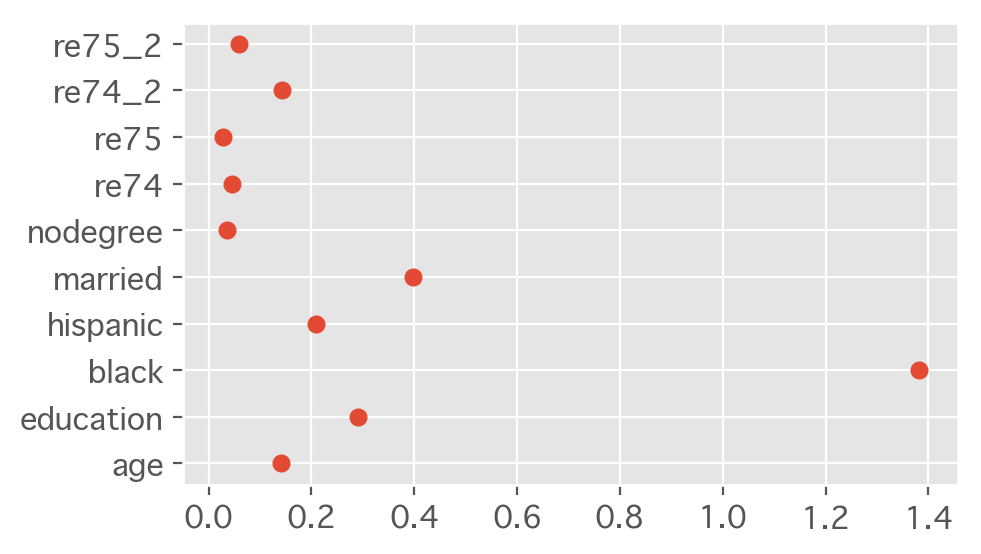

In [177]:
plt.scatter(x, labels)